# Análisis data Spotify
#### Pablo Toloza Castillo

En este codigo podremos apreciar un analisis exploratorio de nuestra BDD que contiene las siguientes columnas:

       - Age: Corresponde al rango de edad.
       - Gender: Genero.
       - Spotify_Usage_Period: Corresponde al tiempo que lleva usando la aplicación.
       - Spotify_Listening_Device: Corresponde al dispositivo en el cual esta usando la aplicación.
       - Spotify_Subscription_Plan: Corresponde al plan de subscripcion que esta usando el usuario.
       - Premium_Sub_Willingness: Está dispuesto a comprar una subscripción en el futuro o desea continuar pagando la subscripción?. (Yes/No)
       - Preffered_Premium_Plan: Corresponde al plan de subscripción premium que tiene o estaría dispuesto a obtener el usuario.
       - Prefferred_Listening_Content: Corresponde a que prefiere escuchar el ususario.
       - Fav_Music_Gender: Corresponde a que genero musical es el favorito del usuario.
       - Music_Time_Slot: Corresponde al momento del día que le gusta escuchar música al usuario.
       - Music_Influencial_Mood: Cuando el usuario escucha música ¿Cual de los siguientes estados de ánimo o situaciones influye más en su elección de música?.
       - Music_Lis_Frequency: Donde o Cuando el usuario escucha música más amenudo?.
       - Music_Expl_Method: Como el usuario descubre nueva musica en Spotify.
       - Music_Recc_Rating: Como puntuaría las recomendaciones de Spotify?
       - Pod_Lis_Frequency: Cuan seguido el usuario escucha Podcast?
       - Fav_Pod_Gender: Qué genero de Podcast el usuario escucha más frecuentemente.
       - Preffered_Pod_Format: Que formato de Podcast el usuario prefiere.
       - Pod_Host_Preference: El usuario esta más inclinado a escuchar Podcast de personas desconocidas o prefiere escuchar Podcast organizados por personas conocidas?.
       - Preffered_Pod_Duration: El usuario prefiere episodios cortos de Podcast (Menos de 30 min) o episodios más extensos (Más de 30 min).
       - Pod_Variety_Satisfaction: El usuario esta satisfecho con la variedad de Podcast disponibles en Spotify?
       
       

Primero que todo agradecer al usuario de Kaggle en el cual me basé para hacer este proyecto

    - MEERA AJAYAKUMAR

Este proyecto se origina desde una pequeña intriga, la cual se remonta a cuando empecé a conocer Spotify. Siempre he escuchado un tipo de musica mas local por lo que me excusaba que la música que escuchaba no se encontraba en la aplicación, fue cuando me dí cuenta que aunque una parte no estaba, otra parte muy grande se encontraba de una manera mucho más comoda que como lo hacía antiguamente que era descargar el disco o la canción.

Pase por muchas aplicaciones desde Ares hasta youtube-to-MP4, ya que cada una tiene sus ventajas y desventajas y al no ser una fuente confiable donde conseguir descargar esta musica siempre me encontraba con errores o el cierre de estas aplicaciones.
Poco después de llegar a la capital de mi país fue cuando un amigo el cual admiro mucho y siempre confió en mí para llegar a desarrollar los proyectos que puedo realizar actualmente, me facilitó una APK de Spotify (Omitiré información sobre hacking etico, etc.) la cual me funcionaba muy bien ya que no tenía las restricciones de un usuario no premium, podía cambiar de canción, buscar todos mis discos preferidos, crear playlist, guardar toda mi música en un lugar y descargar la musica que quisiera para escucharla sin conexión.

Para mí que vengo de un pueblo pequeño donde hace unos años recien llegó el primer "Burger King" y así con varias empresas internacionales que no tuve la oportunidad de conocer hasta llegar a la capital, poder acceder a todo este contenido para mi desconocido hasta ese momento era un mundo nuevo.
Comence a escuchar Podcast más en concreto uno de una persona con la cual me siento muy representada ya que igual es de mi ciudad natal por lo que hace varias aluciones que me recuerdan a mi familia y amigos, el cual se llama TVM o Tomás Va a Morir, este Podcast siempre me ha ayudado a pasar el tiempo y hasta encontrar lo que me llama la atención que es en lo cual estoy trabajando ahora mismo.
La disyuntiva la cual mencioné en el principio fue cuando llegó el momento en que me robaron mi celular, había perdido todo ya que con la APK no se me guardaba en el Cloud de Spotify, las playlist que hice, los capítulos que ya había escuchado, hasta canciones las cuales hasta el día de hoy no he vuelto a encontrar.

En este momento me hice la pregunta de si realmente con la subscripción solo estoy pagando el servicio, donde llegue a la conclusión que, cómo mucha gente y donde nace el fin de este proyecto es si realmente los usuarios estan dispuestos a aceptar una subscripción premium en una aplicación que es de uso gratuito, utilizando una serie de modelos de Machine Learning en los cuales respecto a sus metricas de desempeño definiré cual es el que cumple con lo esperado y sobre ese sacaré una pequeña conclusión. 


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier

In [5]:
#Definimos estilo de Tema de JupyterNotebook.
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('onedork')

In [4]:
#Definimos estilo de Seaborn.
sns.set_theme(style="whitegrid", palette="pastel")

# Análisis exploratorio de las columnas mas influyentes.

In [6]:
#Leemos nuestra data.
df = pd.read_excel('Spotify_data.xlsx')

In [7]:
#Primer vistazo a la BDD.
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,None,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,None,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,None,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,None,None,None,None,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,None,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [8]:
df.dtypes

Age                            object
Gender                         object
spotify_usage_period           object
spotify_listening_device       object
spotify_subscription_plan      object
premium_sub_willingness        object
preffered_premium_plan         object
preferred_listening_content    object
fav_music_genre                object
music_time_slot                object
music_Influencial_mood         object
music_lis_frequency            object
music_expl_method              object
music_recc_rating               int64
pod_lis_frequency              object
fav_pod_genre                  object
preffered_pod_format           object
pod_host_preference            object
preffered_pod_duration         object
pod_variety_satisfaction       object
dtype: object

#### Observamos nuestros tipos de las columnas en la BDD.

<AxesSubplot:>

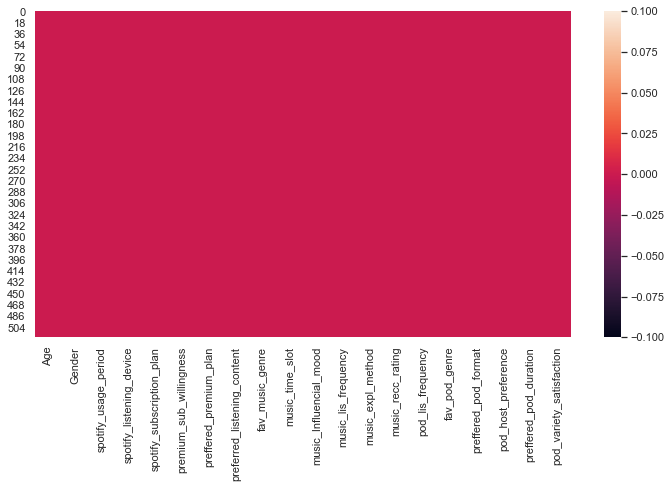

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar='false')


#### Observamos que nuestra BDD no contiene datos perdidos.

No handles with labels found to put in legend.


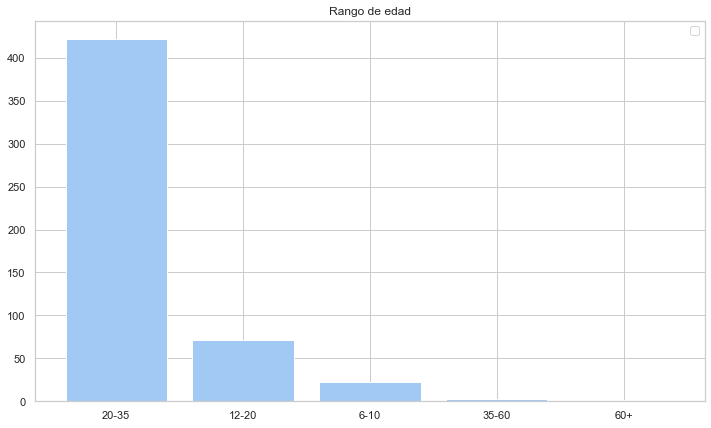

In [10]:
plt.figure(figsize=(12,7))
y=df['Age'].value_counts()
labels=['20-35','12-20','6-10','35-60','60+']
plt.bar(labels,y)
plt.title('Rango de edad')
plt.legend()
plt.show()

Como podemos apreciar en nuestra variable "Age" está bastante desbalanceada, debido a que la mayoría de los usuarios corresponden al rango de edad de 20 a 35 años.

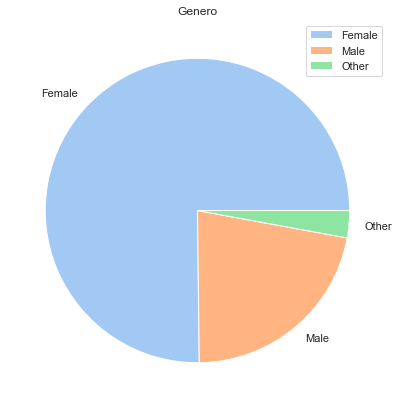

In [11]:

plt.figure(figsize=(10,7))
y=df['Gender'].value_counts()
labels=['Female','Male','Other']
plt.pie(y,labels=labels)
plt.title('Genero')
plt.legend()
plt.show()

Como podemos apreciar en nuestra variable "Gender" está desbalanceada ya que la mayoría de usuarios que utilizan la aplicación son de genero femenino.

Text(0.5, 1.0, 'Subscripción a la aplicación')

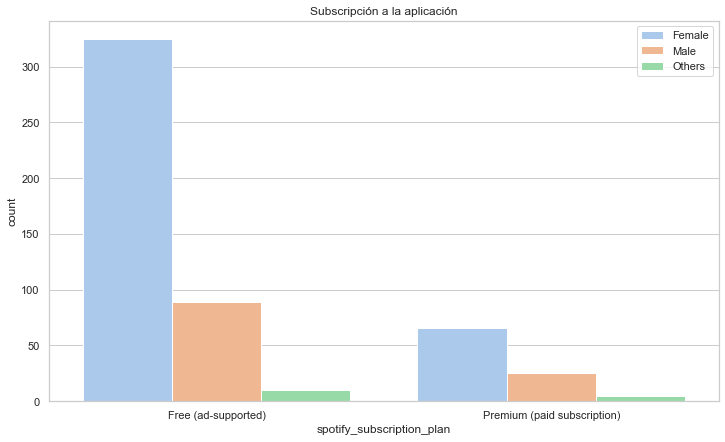

In [12]:
plt.figure(figsize=(12,7))
sns.countplot(x='spotify_subscription_plan', data=df, hue='Gender')
plt.legend(loc='upper right')
plt.title('Subscripción a la aplicación')

Como podemos apreciar en nuestro grafico, nuestra columna que define los usuarios que estan subscritos a un plan o no, se puede inferir que la mayoría de los usuarios usan la aplicación de manera gratuita.

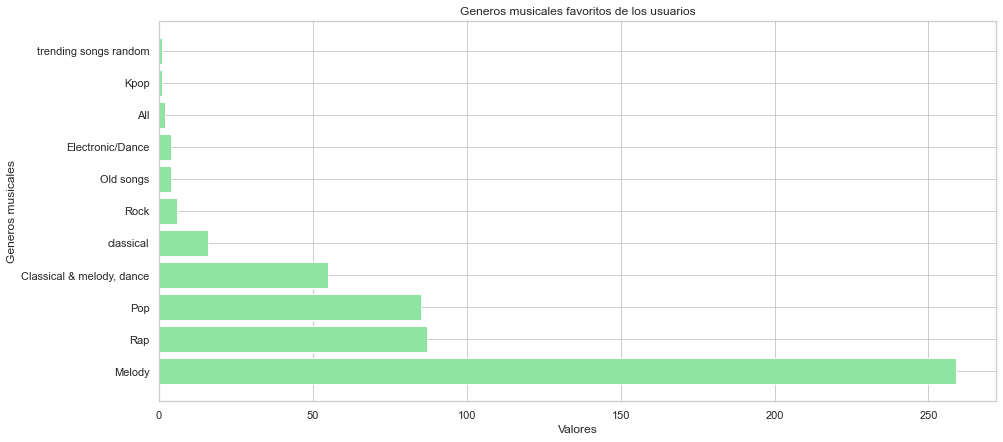

In [13]:
plt.figure(figsize=(15,7))
y2=df['fav_music_genre'].value_counts()
x2=df['fav_music_genre'].unique()
plt.barh(x2,y2,color='g' )
plt.xlabel('Valores')
plt.ylabel('Generos musicales')
plt.title('Generos musicales favoritos de los usuarios')
plt.show()

Como podemos apreciar en nuestra variable "Fav_Music_Gender" hay una gran variabilidad en el genero de musica favorito de los usuarios.

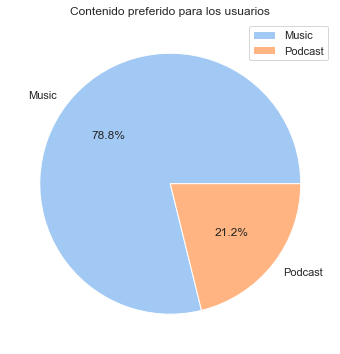

In [30]:
plt.figure(figsize=(6,6))
y4=df['preferred_listening_content'].value_counts()
labels=['Music','Podcast']
plt.pie(y4,labels=labels,autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.title('Contenido preferido para los usuarios')
plt.show()

Como podemos apreciar en nuestra BDD la mayoría de los usuarios utiliza la aplicación para escuchar musica por sobre contenido como Podcast.

Text(0.5, 1.0, 'Puntuación de los usuarios a las recomendaciones de la aplicación')

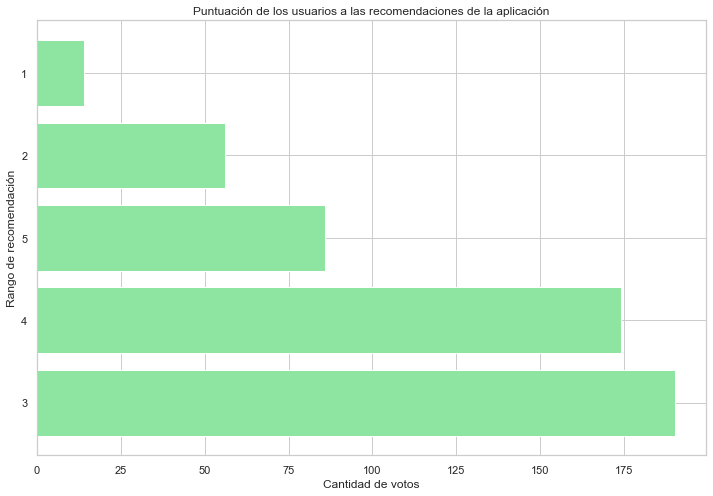

In [19]:
plt.figure(figsize=(12,8))
y5=df['music_recc_rating'].value_counts().values
x4=['3','4','5','2','1']
plt.barh(x4,y5, color='g')
plt.xlabel('Cantidad de votos')
plt.ylabel('Rango de recomendación')
plt.title('Puntuación de los usuarios a las recomendaciones de la aplicación')

# Vector objetivo 

Primeramente tenemos el vector Premium_sub_Willingness el cual nos define si el usuario está dispuesto a comprar la subscripción premium en un futuro, el cual respecto a mi enigmatica es mi vector objetivo.

<AxesSubplot:xlabel='premium_sub_willingness', ylabel='count'>

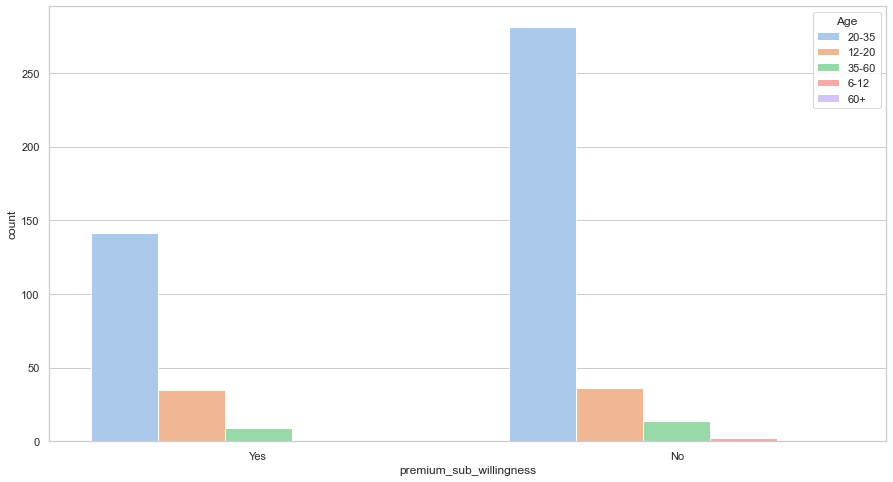

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(x='premium_sub_willingness', data=df, hue='Age')

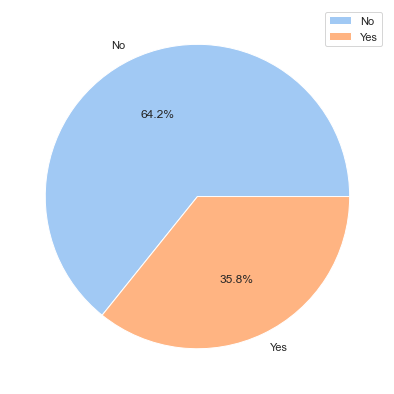

In [29]:
plt.figure(figsize=(12,7))
y7=df['premium_sub_willingness'].value_counts()
labels=['No', 'Yes']
plt.pie(y7,labels=labels,autopct='%1.1f%%')
plt.legend(loc='upper right')

Como podemos apreciar nuestro vector objetivo está inclinado gran parte a no obtener una subscripcion premium en un futuro.

In [35]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
lst=['Age','Gender','spotify_usage_period','spotify_listening_device','spotify_subscription_plan','premium_sub_willingness','preffered_premium_plan','preferred_listening_content','fav_music_genre','music_time_slot','music_Influencial_mood','music_lis_frequency','music_expl_method','pod_lis_frequency','fav_pod_genre','preffered_pod_format','pod_host_preference','preffered_pod_duration','pod_variety_satisfaction']
for i in lst:
      df[i]=le.fit_transform(df[i])

Importamos la función de Sklearn Label Encoder para poder generar un mapa de calor de nuestra BDD

<AxesSubplot:>

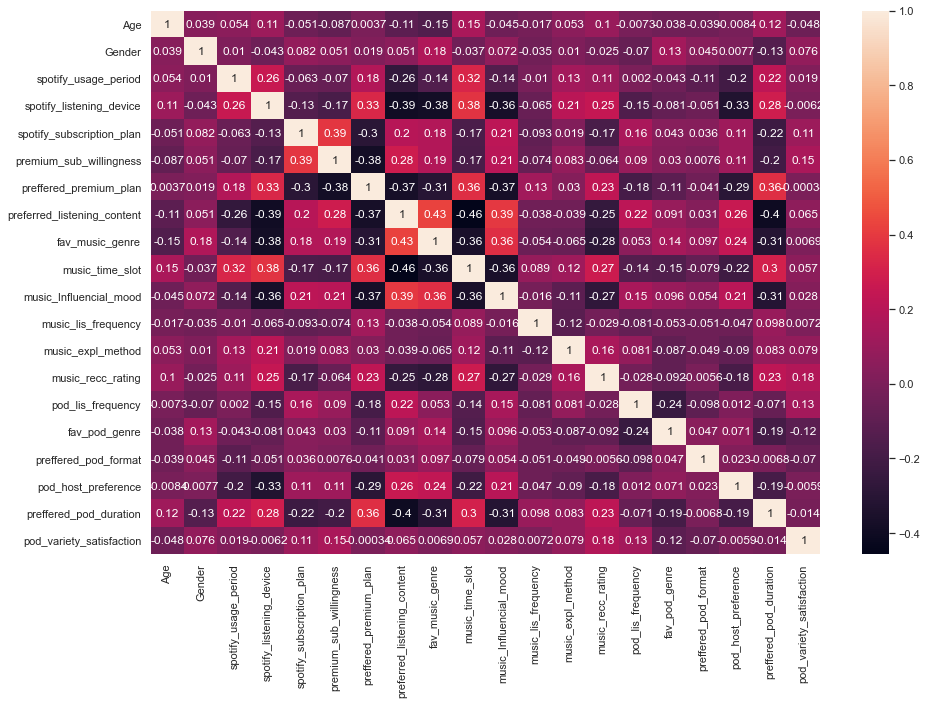

In [38]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

# Fin analisis exploratorio

Para continuar me gustaría recalcar qué conclusiones podemos generar con este analisis.
        
        - Lo primero que podemos inferir es que la mayoría de los usuarios encuentados se encuentras entre el rango de edad 20 - 35 años.
        - También podemos apreciar que el genero que mas utiliza la aplicación respecto a los usuarios encuestados es Female.
        - Por otra parte la mayoría de los usuarios encuestados prefieres un plan Gratis de la aplicación antes que una subscripción de Pago.
        - Respecto a la preferencia musical de los usuarios encuestados podemos inferir que la mayoría utiliza la aplicación para escuchar musica mas melodica seguido por generos como el Rap y el Pop, dejando por detras generos como Electronica o Kpop.
        - Respecto al contenido preferido para escuchar en la aplicación podemos apreciar una fuerte tendencia a la Musica antes que a los Podcast.
        - Por su lado los usuarios estan generalmente contentos con la musica recomendada por el algoritmo de la aplicación, teniendo como mayor opción un rating de 3pts de 5.

Continuaremos con la partición de la Data para proceder con el modelado.

In [40]:
df_model=df.drop(['Age', 'music_recc_rating', 'fav_pod_genre', 'preffered_pod_format', 'premium_sub_willingness'], axis=1)
vector = df['premium_sub_willingness']

Continuamos sacando el Min/Max Scaler

In [42]:
from sklearn.preprocessing import MinMaxScaler

minmax=MinMaxScaler()
Xsc=minmax.fit_transform(df_model)
Xsc

array([[0.        , 1.        , 0.28571429, ..., 0.        , 0.        ,
        0.25      ],
       [0.5       , 1.        , 0.        , ..., 0.        , 0.66666667,
        0.5       ],
       [1.        , 0.33333333, 0.28571429, ..., 0.33333333, 0.        ,
        0.5       ],
       ...,
       [0.        , 1.        , 0.42857143, ..., 0.        , 1.        ,
        0.25      ],
       [0.        , 0.33333333, 0.42857143, ..., 0.        , 0.33333333,
        0.5       ],
       [0.        , 1.        , 0.5       , ..., 0.33333333, 0.66666667,
        0.25      ]])

### Dividimos la Data para empezar a modelar

In [44]:
X_train,X_test,y_train,y_test=train_test_split(Xsc,vector,test_size=0.2,random_state=2)

In [45]:
X_train.shape

(416, 15)

In [46]:
y_train.shape

(416,)

Empezaré con un modelo de Linear Discriminant Analisis

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
modelo_lda = LinearDiscriminantAnalysis()
modelo_lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [51]:
#Para su evaluación guardaremos las predicciones de clases
lda_class_pred = modelo_lda.predict(X_test)
#Imprimimos predicciones
print(classification_report(y_test, lda_class_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        66
           1       0.81      0.58      0.68        38

    accuracy                           0.80       104
   macro avg       0.80      0.75      0.77       104
weighted avg       0.80      0.80      0.79       104



Como se observa, las metricas en esta primera instancia son bastante buenas. Con un 0.81 de precision para su clase uno, con un recall de 0.58 y un accuracy de 0.80.

Para continuar pondré a prueba una serie de modelos para verificar como se comportan entre ellos.

Modelo Gradient Boositng

In [52]:
modelo_gb = GradientBoostingClassifier()
modelo_gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [53]:
#Guardamos las predicciones de clase
gb_class_pred = modelo_gb.predict(X_test)
#Imprimimos predicciones
print(classification_report(y_test, gb_class_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86        66
           1       0.78      0.66      0.71        38

    accuracy                           0.81       104
   macro avg       0.80      0.78      0.78       104
weighted avg       0.81      0.81      0.80       104



Como podemos apreciar en nuestras métricas el modelo de Gradient Boosting al igual que el de Linear Discrminant Analisys tiene un buen desempeño en general, con un 0.79 de precission en su clase 1, un 0.66 de su recall y con un 0.81 en su accuracy.

Modelo Random forest

In [55]:
modelo_rf = RandomForestClassifier()
modelo_rf.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
#Guardamos predicciones de clase
rf_class_pred = modelo_rf.predict(X_test)
#Imprimimos predicciones
print(classification_report(y_test, rf_class_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        66
           1       0.82      0.74      0.78        38

    accuracy                           0.85       104
   macro avg       0.84      0.82      0.83       104
weighted avg       0.84      0.85      0.84       104



Respecto al desempeño de los modelos anteriores, nuestro modelo de Random Forest hasta ahora es el que ha entregado las mejores métricas de desempeño, con un 0.82 de preccision en su clase 1, un 0.74 de recall y un 0.85 de accuracy.

Modelo Adaboost

In [58]:
modelo_adaboost = AdaBoostClassifier()
modelo_adaboost.fit(X_train, y_train)

AdaBoostClassifier()

In [60]:
#Guardamos predicciones de clase
ada_class_pred = modelo_adaboost.predict(X_test)
#Imprimimos metricas
print(classification_report(y_test, ada_class_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        66
           1       0.74      0.61      0.67        38

    accuracy                           0.78       104
   macro avg       0.77      0.74      0.75       104
weighted avg       0.78      0.78      0.77       104



Como podemos apreciar en las metricas de desempeño para el modelo de Adaboost, es un poco mas bajo de lo generado anteriormente con los otros modelos, con un 0.74 de precision en su clase 1, un 0.61 de recall y con un 0.78 de accuracy.

Modelo Decission Tree Clasifier

In [61]:
modelo_dtc = DecisionTreeClassifier()
modelo_dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
#Guardamos metricas para cada clase
dtc_class_pred = modelo_dtc.predict(X_test)
#Imprimimos metricas
print(classification_report(y_test,dtc_class_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        66
           1       0.72      0.55      0.63        38

    accuracy                           0.76       104
   macro avg       0.75      0.72      0.72       104
weighted avg       0.76      0.76      0.75       104



Como podemos apreciar en nuestras metricas de desempeño el modelo de Decision Tree Clasifier tiene un precision de 0.72 en su clase 1, un 0.55 de recall y con un 0.76 de acuracy.

# Con esto doy por finalizado la etapa de modelado.

Para continuar utilizaré mis 3 mejores modelos para graficarlos con una curva ROC, la cual nos muestra la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos del modelo. Por lo tanto mientras más hacia la izquierda superior esté la curva ROC, nuestro modelo será mejor.

Mis mejores modelos son: 
        
        - LinearDiscriminantAnalysis()
        - GradientBoostingClassifier()
        - RandomForestClassifier()

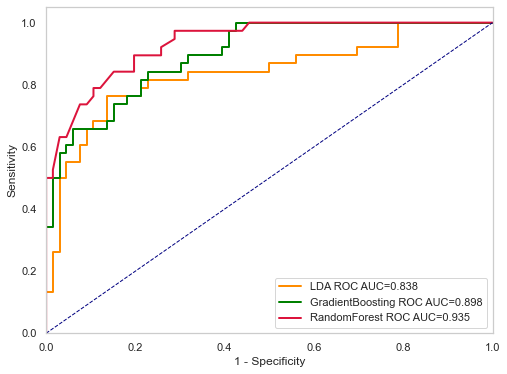

In [68]:
import matplotlib
from sklearn.metrics import roc_auc_score, roc_curve

lda_prediction_proba = modelo_lda.predict_proba(X_test)[:, 1]
gb_prediction_proba = modelo_gb.predict_proba(X_test)[:, 1]
rf_prediction_proba = modelo_rf.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8, 6))
matplotlib.rcParams.update({'font.size': 14})
plt.grid()
fpr, tpr, _ = roc_curve(y_test.ravel(), lda_prediction_proba.ravel())
roc_auc = roc_auc_score(y_test.ravel(), lda_prediction_proba.ravel())
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='LDA ROC AUC={0:.3f}'.format(roc_auc))

fpr, tpr, _ = roc_curve(y_test.ravel(), gb_prediction_proba.ravel())
roc_auc = roc_auc_score(y_test.ravel(), gb_prediction_proba.ravel())
plt.plot(fpr, tpr, color='green', lw=2,
         label='GradientBoosting ROC AUC={0:.3f}'.format(roc_auc))

fpr, tpr, _ = roc_curve(y_test.ravel(), rf_prediction_proba.ravel())
roc_auc = roc_auc_score(y_test.ravel(), rf_prediction_proba.ravel())
plt.plot(fpr, tpr, color='crimson', lw=2,
         label='RandomForest ROC AUC={0:.3f}'.format(roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.show()

En conclusión nuestro modelo de Random Forest está un poco por sobre nuestros modelos de Linear Discriminant Analisys y Gradient Boosting.

Para concluir este proyecto quería enfatizar que quede muy conforme con los resultados, solo quedaría utilizar el modelo para un caso real para ver su variabilidad y asi inferir si funciona para una mayor cantidad de registros.